In [1]:
import csky as cy
import numpy as np
import matplotlib.pyplot as plt
import histlite as hl
import matplotlib as mpl
plt.rc('font', size=16)
'''plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})'''
plt.rcParams['axes.facecolor']='w'
plt.rcParams['savefig.facecolor']='w'
cy.plotting.mrichman_mpl()
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
#mpl.rcParams['font.sans-serif'] = ['Computer Modern Sans Serif']

/mnt/ceph1-npx/user/ssclafani/software/external/csky/csky/plotting.py:92: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  r'\SetSymbolFont{operators}   {sans}{OT1}{cmss} {m}{n}'


In [2]:
repo = cy.selections.Repository()

In [3]:
specs = cy.selections.PSDataSpecs.IC86v3_2017

In [4]:
ana = cy.get_analysis(repo, 'version-003-p02', specs)

Setting up Analysis for:
IC86v3_2017
Setting up IC86v3_2017...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC86_2012_MC.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC86_2017_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/GRL/IC86_2017_exp.npy ...
Energy PDF Ratio Model...
  * gamma = 4.0000 ...
Signal Acceptance Model...
  * gamma = 4.0000 ...
Done.


In [5]:
a = ana.anas[0]

In [6]:
colors = {}
colors['PSTracks'] = 'grey'
colors['GFU'] = 'C0'
colors['NT'] = 'C1'

In [7]:
plt.rcParams['axes.facecolor']='w'
plt.rcParams['savefig.facecolor']='w'

In [8]:
def effa_plot(ax, ana, dec_deg_min = -90, dec_deg_max = 90, label = 'MISC', color = 'k', ls = '-'):
    a = ana.anas[-1]
    mask = (a.sig.dec < np.radians(dec_deg_max)) & (a.sig.dec > np.radians(dec_deg_min))
    
    dlogE=.2 #.1
    solid_angle=2*np.pi*(np.sin(np.radians(dec_deg_max))-np.sin(np.radians(dec_deg_min)))
    area= 1/ (1e4*np.log(10)) * (a.sig.oneweight[mask] / ( a.sig.true_energy[mask] *  solid_angle *  dlogE))
    if 'GRECO' in label:
        bins = np.arange(.5,6,dlogE)
    else:
        bins=np.arange(2,7.01,dlogE)
    h = hl.hist(np.log10(a.sig.true_energy[mask]), weights=area, bins=bins);
    print(label)
    hl.plot1d(h, histtype='step', linewidth=2, color=color, label=label, ls = ls)
    ax.semilogy()

    ax.grid()
    ax.legend(loc='lower right')
    ax.set_ylabel('$A_\mathsf{Eff}$($m^2$)')
    ax.set_xlabel('log$_{10}$(E) [GeV]')
    if 'GRECO' in label:
        ax.set_xlim(.5,6)
        ax.set_ylim((1e-8,1e2))
    else:
        ax.set_xlim((2,7))
        ax.set_ylim((1e-4,1e3))
    plt.tight_layout()
    return h

In [9]:
def event_rate(ana):
    a = ana.anas[-1]
    sig = a.sig
    event_rate = len(a.data.ra) / a.bg_livetime
    print('Event Rate {:.3} Hz'.format(event_rate))
    print('{:3f} Events / year'.format(len(a.data.ra) / a.bg_livetime * 86400 * 365))
    
    mask = a.data.dec > np.radians(-5)
    
    event_rate = len(a.data.ra[mask]) / a.bg_livetime
    print('Northern Event Rate {:.3} Hz'.format(event_rate))
    print('{:3f} Events / year'.format(len(a.data.ra[mask]) / a.bg_livetime * 86400 * 365))

    mask = a.data.dec < np.radians(-5)

    event_rate = len(a.data.ra[mask]) / a.bg_livetime
    print('Southern Event Rate {:.3} Hz'.format(event_rate))
    print('{:3f} Events / year'.format(len(a.data.ra[mask]) / a.bg_livetime * 86400 * 365))


In [10]:
def effa_plot_notlogged(ax, ana, dec_deg_min = -90, dec_deg_max = 90, label = 'MISC', color = 'k', ls = '-'):
    a = ana.anas[-1]
    mask = (a.sig.dec < np.radians(dec_deg_max)) & (a.sig.dec > np.radians(dec_deg_min))
    
    dlogE=.1 #.1
    bins = 10**np.arange(2,7,dlogE)
    solid_angle=2*np.pi*(np.sin(np.radians(dec_deg_max))-np.sin(np.radians(dec_deg_min)))
    area= 1/ (1e4*np.log(10)) * (a.sig.oneweight[mask] / ( a.sig.true_energy[mask] *  solid_angle *  dlogE))

    h = hl.hist((a.sig.true_energy[mask]), weights=area, bins=bins);
    if label == 'tracks_label':
        plot_label = r'Tracks $\it{(22)}$'
    elif label == 'cascades_label':
        plot_label = r'Cascades $\it{(14)}$'
    else:
        plot_label = label
    hl.plot1d(h, histtype='step', linewidth=2, color=color, label=plot_label, ls = ls, log=True)
    ax.loglog()

    ax.grid()
    ax.legend(loc='lower right')
    ax.set_ylabel('$A_\mathsf{Eff}$($m^2$)')
    ax.set_xlabel('log$_{10}$(E) [GeV]')

    ax.set_xlim((10**2,10**7))
    ax.set_ylim((1e-4,1e3))
    plt.tight_layout()
    return h

In [11]:
embargo_label = False
if embargo_label:
    plot_dir = cy.utils.ensure_dir('/home/ssclafani/plots/paperplots_embargo/Fig2')
else:
    plot_dir = cy.utils.ensure_dir('/home/ssclafani/public_html/Publications/GP/paperplots/Fig2')


PSTracks-v4-South


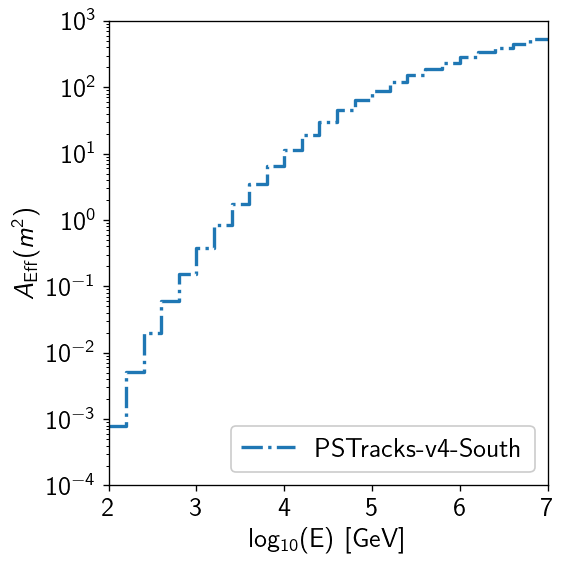

In [12]:
plt.rc ('font', size=16)
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
label = 'PSTracks'
dec_deg_min = -5
dec_deg_max = 90
#ps_northern_hist = effa_plot(ax1, ana, dec_deg_min = dec_deg_min, dec_deg_max = dec_deg_max, label = 'PSTracks-v4-North', color = 'C0', ls='-')

ps_southern_hist = effa_plot(ax1,ana, dec_deg_min = dec_deg_min, dec_deg_max = dec_deg_max, label = 'PSTracks-v4-South', color = 'C0', ls = '-.')
plt.grid()



#cy.plotting.saving (plot_dir, 'effa_{}_{}_{}'.format(label, str(dec_deg_min).replace('-', 'm'), str(dec_deg_max).replace('-', 'm')))


(100.0, 100000000.0)

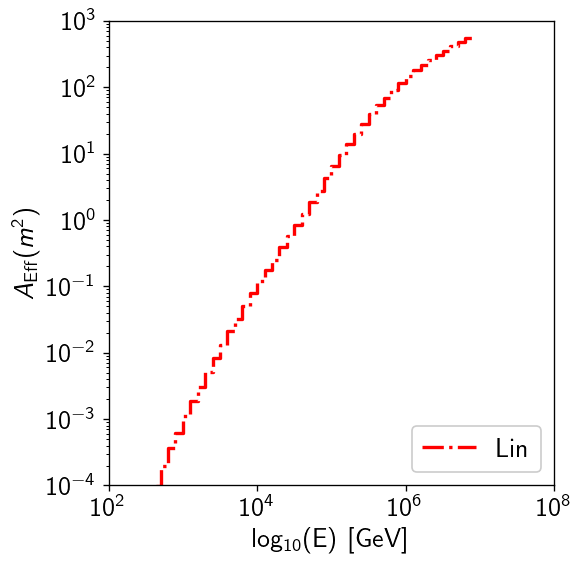

In [13]:
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
label = 'PSTracks'

dec_deg_min = -90
dec_deg_max = -5
#ps_southern_hist = effa_plot(ax1,ana, dec_deg_min = dec_deg_min, dec_deg_max = dec_deg_max, label = 'PSTracks-v4-South', color = 'C0', ls = '-.')
plt.grid()

ps_southern_hist = effa_plot_notlogged(ax1,ana, dec_deg_min = dec_deg_min, dec_deg_max = dec_deg_max, label = 'Lin', color = 'red', ls = '-.')

'''
#fig, ax = plt.subplots()
SolidAngle=2*np.pi*(np.sin(np.radians(dec_deg_max))-np.sin(np.radians(dec_deg_min)))
mask = (a.sig.dec < np.radians(dec_deg_max)) & (a.sig.dec > np.radians(dec_deg_min))

Weight=a.sig.oneweight[mask]*(1/SolidAngle)*1e-4

h2,edges=np.histogram(np.log10(a.sig.true_energy[mask]),weights=Weight,bins=np.arange(2,8.01,.01))
lin_edges=10**edges
widths=lin_edges[1:]-lin_edges[:-1]
h2/=widths
centers2=(edges[:-1]+edges[1:])/2
'''
#ax1.semilogy(centers2,h2);
#plt.ylim(1e-3,1e4)
plt.xlim(1e2,1e8)

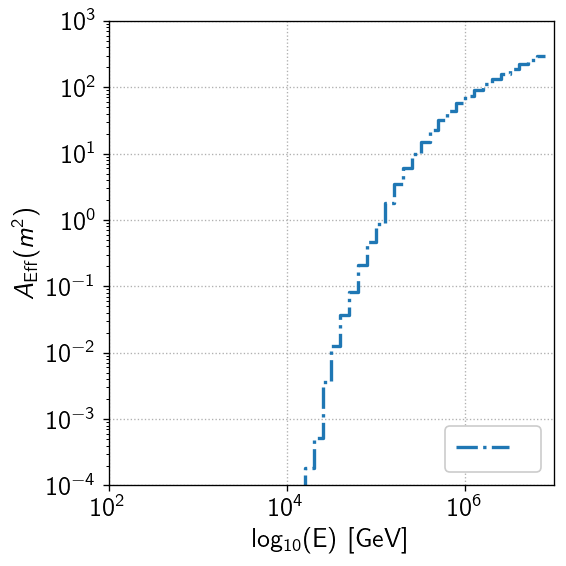

In [14]:
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
x = effa_plot_notlogged(ax1,ana, dec_deg_min = -90, 
                                       dec_deg_max = -45, label = ' ', color = 'C0', ls = '-.')


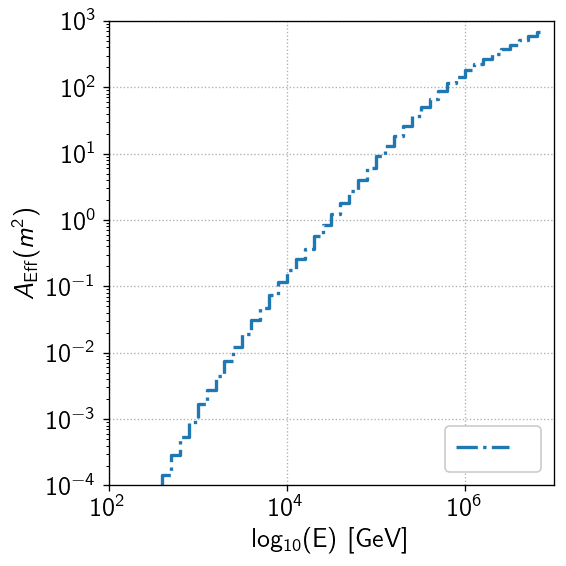

In [15]:
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
y = effa_plot_notlogged(ax1,ana, dec_deg_min = -45, 
                                       dec_deg_max = -5, label = ' ', color = 'C0', ls = '-.')


[]

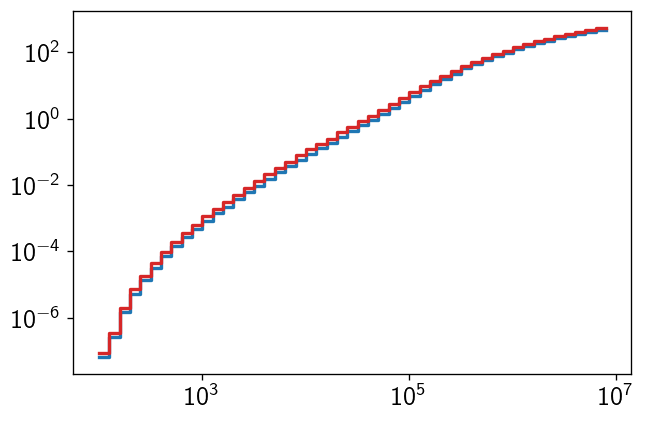

In [16]:
fig, ax = plt.subplots()
hl.plot1d(ax, (x+y)/2, log=True)
hl.plot1d(ax, ps_southern_hist)
plt.loglog()

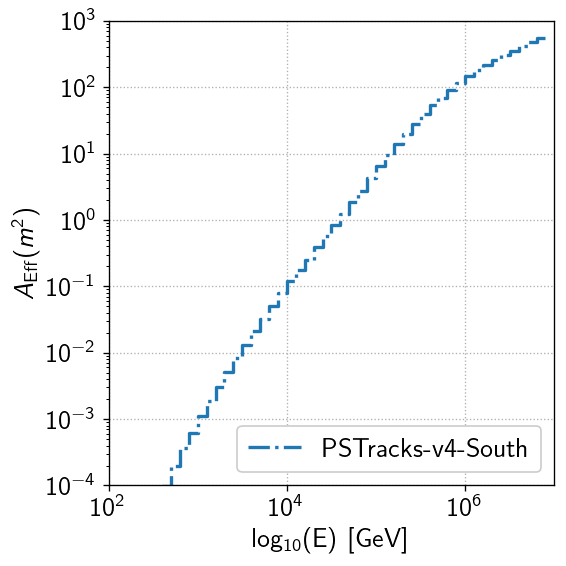

In [17]:
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
ps_southern_hist = effa_plot_notlogged(ax1,ana, dec_deg_min = dec_deg_min, 
                                       dec_deg_max = dec_deg_max, label = 'PSTracks-v4-South', color = 'C0', ls = '-.')


In [18]:
dndenorm = 1.66
dndegamma = 2.53

[]

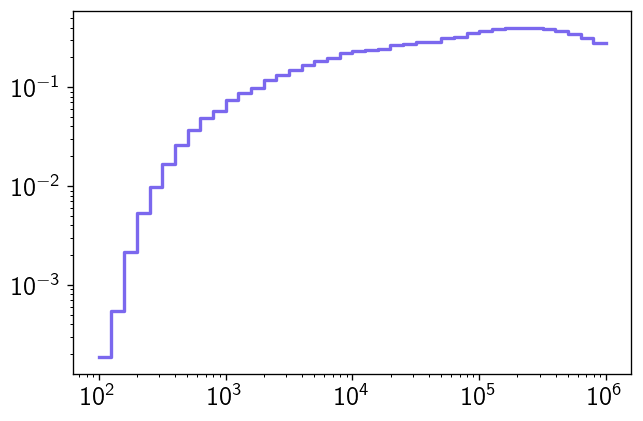

In [19]:
fig, ax = plt.subplots()
dlogE = .1
bins=10**np.arange(2,6.01,dlogE)
dec_deg_max = -5
dec_deg_min = -90
mask = (a.sig.dec < np.radians(dec_deg_max)) & (a.sig.dec > np.radians(dec_deg_min))

h_dNdE_tracks = hl.hist((a.sig[mask].true_energy), 
                        365*86400*dndenorm*1e-18*a.sig[mask].oneweight*(a.sig[mask].true_energy/1e5)**-dndegamma, 
                        bins=bins)
tot_tracks = sum(365*86400*dndenorm*1e-18*a.sig[mask].oneweight*(a.sig[mask].true_energy/1e5)**-dndegamma)
hl.plot1d(ax, h_dNdE_tracks, label = r'tracks_expected events', color = 'mediumslateblue')
plt.loglog()

In [20]:
specs = cy.selections.MESEDataSpecs.mesc_7yr
ana = cy.get_analysis(repo, 'version-001-p02', specs)

Setting up Analysis for:
MESC_2010_2016
Setting up MESC_2010_2016...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_MC.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2014_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2015_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2016_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/

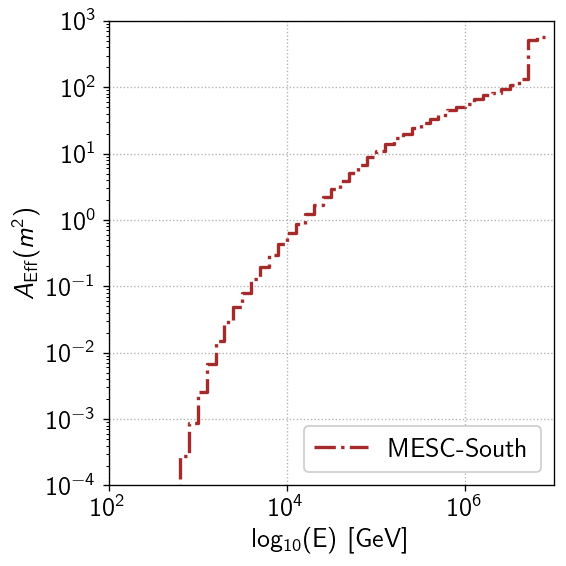

In [21]:
plt.rc ('font', size=16)
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
label = 'MESC'
dec_deg_min = -5
dec_deg_max = 90
#mese_northern_hist = effa_plot(ax1, ana, dec_deg_min = dec_deg_min, 
#                               dec_deg_max = dec_deg_max, label = 'MESC-North', color = 'brown', ls='-')

dec_deg_min = -90
dec_deg_max = -5
mese_southern_hist = effa_plot_notlogged(ax1,ana, dec_deg_min = dec_deg_min, 
                               dec_deg_max = dec_deg_max, label = 'MESC-South', color = 'brown', ls = '-.')




#plot_dir = cy.utils.ensure_dir('/home/ssclafani/public_html/TechLead/DataSet_Plots/{}'.format(label))
#cy.plotting.saving (plot_dir, 'effa_{}_{}_{}'.format(label, str(dec_deg_min).replace('-', 'm'), str(dec_deg_max).replace('-', 'm')))


In [22]:
a = ana.anas[-1]

[]

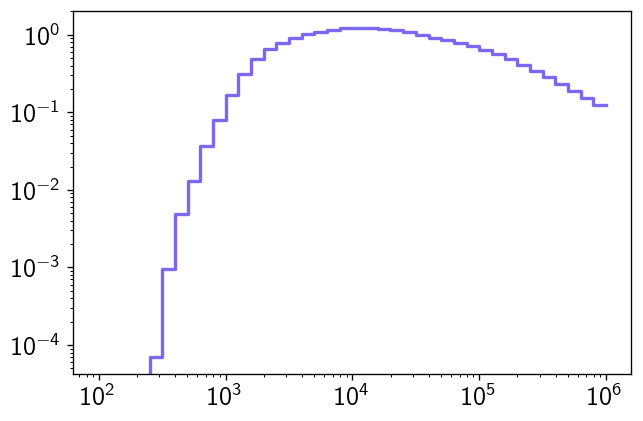

In [23]:
fig, ax = plt.subplots()
bins=10**np.arange(2,6.01,dlogE)

dec_deg_max = -5
dec_deg_min = -90
mask = (a.sig.dec < np.radians(dec_deg_max)) & (a.sig.dec > np.radians(dec_deg_min))
h_dNdE_mese = hl.hist((a.sig[mask].true_energy), 
                      365*86400*dndenorm*1e-18*a.sig[mask].oneweight*(a.sig[mask].true_energy/1e5)**-dndegamma, 
                      bins=bins)
tot_mese = sum(365*86400*dndenorm*1e-18*a.sig[mask].oneweight*(a.sig[mask].true_energy/1e5)**-dndegamma)
hl.plot1d(ax, h_dNdE_mese, label = r'mese_expected events', color = 'mediumslateblue')
plt.loglog()

In [24]:
repo = cy.selections.Repository()

In [25]:
#specs = [Cascades]
specs = cy.selections.DNNCascadeDataSpecs.DNNC_10yr
ana = cy.get_analysis (repo, 'version-001-p01', specs)

Setting up Analysis for:
DNNCascade_10yr
Setting up DNNCascade_10yr...
Reading /data/ana/analyses/dnn_cascades/version-001-p01/MC_NuGen_bfrv1_2153x.npy ...
Reading /data/ana/analyses/dnn_cascades/version-001-p01/IC86_2011_exp.npy ...
Reading /data/ana/analyses/dnn_cascades/version-001-p01/IC86_2012_exp.npy ...
Reading /data/ana/analyses/dnn_cascades/version-001-p01/IC86_2013_exp.npy ...
Reading /data/ana/analyses/dnn_cascades/version-001-p01/IC86_2014_exp.npy ...
Reading /data/ana/analyses/dnn_cascades/version-001-p01/IC86_2015_exp.npy ...
Reading /data/ana/analyses/dnn_cascades/version-001-p01/IC86_2016_exp.npy ...
Reading /data/ana/analyses/dnn_cascades/version-001-p01/IC86_2017_exp.npy ...
Reading /data/ana/analyses/dnn_cascades/version-001-p01/IC86_2018_exp.npy ...
Reading /data/ana/analyses/dnn_cascades/version-001-p01/IC86_2019_exp.npy ...
Reading /data/ana/analyses/dnn_cascades/version-001-p01/IC86_2020_exp.npy ...
Reading /data/ana/analyses/dnn_cascades/version-001-p01/GRL/IC86

In [26]:
a = ana[0]

In [27]:
print(a.data)

Events(59592 items | columns: azimuth, dec, energy, event, log10energy, mjd, ra, run, sigma, sindec, subevent)


In [28]:
a = ana.anas[-1]
mask = (a.data.log10energy > 5) & (a.data.dec > np.radians(-5))
sum(mask)

53

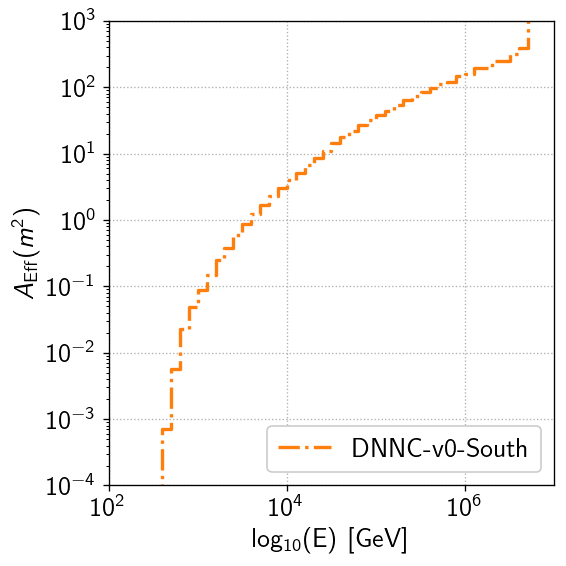

In [29]:
plt.rc ('font', size=16)
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
label = 'DNNCascade'
#dec_deg_min = -5
#dec_deg_max = 90
#DNNC_northern_hist = effa_plot(ax1, ana, dec_deg_min = dec_deg_min, dec_deg_max = dec_deg_max, label = 'DNNC-v0-North', color = 'C3', ls='-')

dec_deg_min = -90
dec_deg_max = -5
DNNC_southern_hist = effa_plot_notlogged(ax1,ana, dec_deg_min = dec_deg_min, dec_deg_max = dec_deg_max, label = 'DNNC-v0-South', color = 'C3', ls = '-.')




#plot_dir = cy.utils.ensure_dir('/home/ssclafani/public_html/TechLead/DataSet_Plots/{}'.format(label))
#cy.plotting.saving (plot_dir, 'effa_{}_{}_{}'.format(label, str(dec_deg_min).replace('-', 'm'), str(dec_deg_max).replace('-', 'm')))


[]

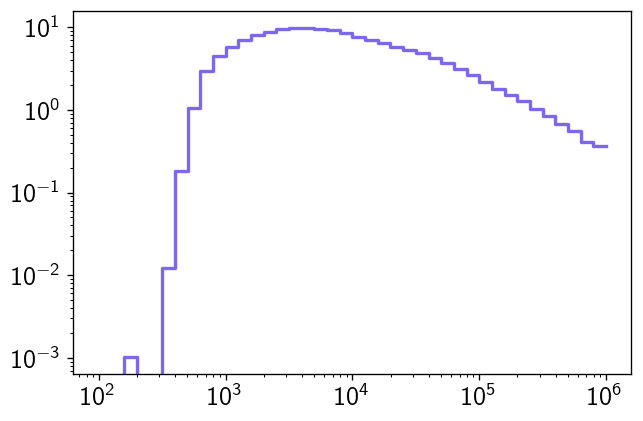

In [30]:
fig, ax = plt.subplots()
bins=10**np.arange(2,6.01,dlogE)
dec_deg_max = -5
dec_deg_min = -90
mask = (a.sig.dec < np.radians(dec_deg_max)) & (a.sig.dec > np.radians(dec_deg_min))
h_dNdE_dnnc = hl.hist((a.sig[mask].true_energy), 
                      365*86400*dndenorm*1e-18*a.sig[mask].oneweight*(a.sig[mask].true_energy/1e5)**-dndegamma, 
                      bins=bins)
tot_dnnc =sum(365*86400*dndenorm*1e-18*a.sig[mask].oneweight*(a.sig[mask].true_energy/1e5)**-dndegamma)
hl.plot1d(ax, h_dNdE_dnnc, label = r'dnnc_expected events', color = 'mediumslateblue')
plt.loglog()

In [31]:
soft_colors = cy.plotting.soft_colors

Text(0, 0.5, 'Expected Events per year (E$^{-3}$)')

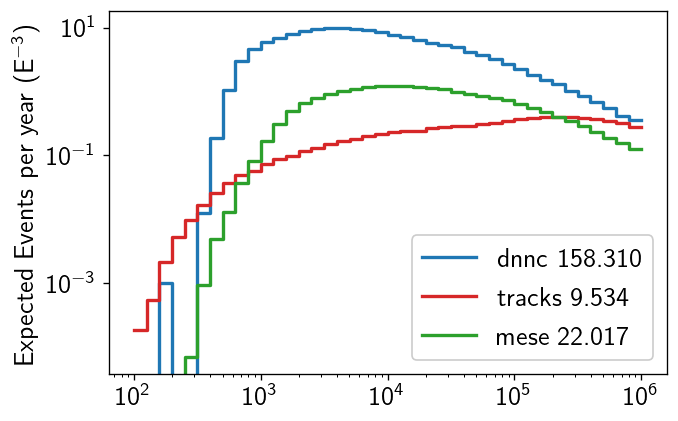

In [32]:
fig, ax = plt.subplots()
hl.plot1d(ax, h_dNdE_dnnc, label = r'dnnc {:.3f}'.format(tot_dnnc), color = 'C0')
hl.plot1d(ax, h_dNdE_tracks, label = r'tracks {:.3f}'.format(tot_tracks), color = 'C1')
hl.plot1d(ax, h_dNdE_mese, label = r'mese {:.3f}'.format(tot_mese), color = 'C2')
plt.loglog()
plt.legend()
plt.ylabel('Expected Events per year (E$^{-3}$)')
#plt.xlim(3,7)

In [33]:
colors = ['#0B3D53', '#FF7F0E',  '#5C9FC9']

In [34]:
h_dNdE_dnnc.integrate().values

array(1119118.13037048)

In [35]:
mpl.rcParams['font.serif']
mpl.rcParams['lines.linewidth'] = 2

In [36]:
mpl.rcParams['font.serif']

['DejaVu Serif',
 'Bitstream Vera Serif',
 'Computer Modern Roman',
 'New Century Schoolbook',
 'Century Schoolbook L',
 'Utopia',
 'ITC Bookman',
 'Bookman',
 'Nimbus Roman No9 L',
 'Times New Roman',
 'Times',
 'Palatino',
 'Charter',
 'serif']

-> /home/ssclafani/public_html/Publications/GP/paperplots/Fig2/effa_ps_tracks_cascades_bothaxis


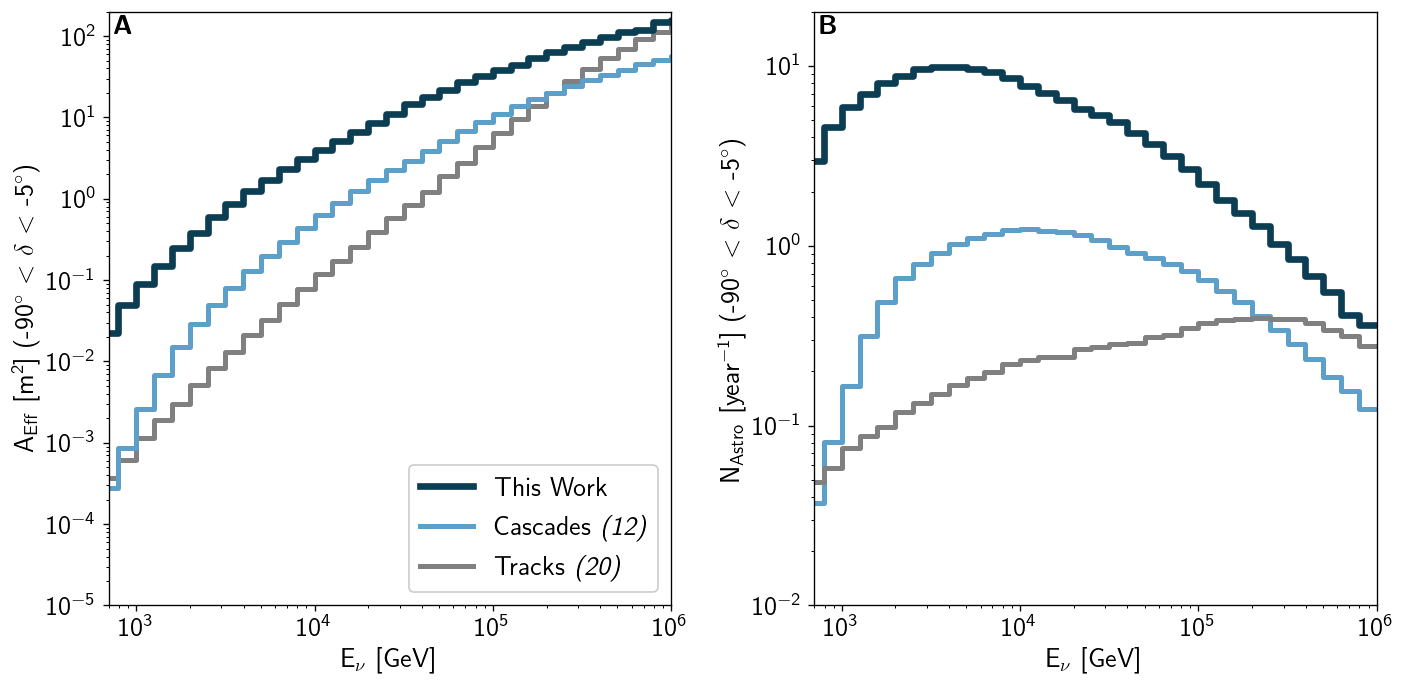

In [37]:
plt.rc('font', size=16)
label = 'ps_tracks_cascades'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))


hl.plot1d(ax1, ps_southern_hist, label=r'Tracks $\textit{(20)}$', 
          color = 'grey', lw=3, ls='-', zorder=-1, vectorized=True)
hl.plot1d(ax1, mese_southern_hist, label=r'Cascades \textit{(12)}', 
          color = colors[2], lw=3, ls='-', zorder=-1,  vectorized=True)
hl.plot1d(ax1, DNNC_southern_hist, label=r'This Work', color = colors[0], lw=4,ls='-',  vectorized=True)

hl.plot1d(ax2, h_dNdE_dnnc, lw=4, label = r'n$_{{signal}}$: {:.1f}'.format(tot_dnnc), color = colors[0],  vectorized=True)
hl.plot1d(ax2, h_dNdE_mese,lw=3,  label = r'n$_{{signal}}$: {:.1f}'.format(tot_mese), color = colors[2],  vectorized=True)
hl.plot1d(ax2, h_dNdE_tracks, lw=3, label = r'n$_{{signal}}$: {:.1f}'.format(tot_tracks), color = 'grey',  vectorized=True)


ax2.loglog()
ax2.set_ylabel(r'N$_\mathsf{Astro}$ [year$^{-1}$] (-90$^\circ$ $<$ $\delta$ $<$ -5$^\circ$)')

ax2.set_ylim(1e-2,20)
ax2.set_yticks([1e-2, 1e-1, 1,10])
#fig.suptitle('-90$^\circ$ $<$ $\delta$ $<$ -5$^\circ$')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], loc='lower right')

ax1.set_ylabel('A$_\mathsf{Eff}$ [m$^2$] (-90$^\circ$ $<$ $\delta$ $<$ -5$^\circ$)')
ax2.set_xlabel(r'E$_\nu$ [GeV]')
ax1.set_xlabel(r'E$_\nu$ [GeV]')


ax1.loglog()
ax1.set_xlim(700, 1e6)
ax2.set_xlim(700, 1e6)

ax1.set_ylim(1e-5,2e2)


ax1.text(750, 180, r'\textbf{\textsf{A}}', verticalalignment='top', fontdict={'fontweight' : 'bold',
                                   'fontsize' : 16,
                                   'family' : 'serif'})

ax2.text(750, 19, r'\textbf{\textsf{B}}', verticalalignment='top',fontdict={'fontweight' : 'bold',
                                   'fontsize' : 16,
                                   'family' : 'serif'})
if embargo_label:
    ax1.text(1e3, 100, r'Under Embargo, Not For Proceedings', 
             weight='bold', c='r', alpha=1,size=16)
    ax2.text(1e3, 1.2e-2, r'Under Embargo, Not For Proceedings', 
             weight='bold', c='r', alpha=1,size=16)  
    

#ax1.set_yticks('both')
#ax1.text(1.8, 700, 'IceCube Preliminary', c='r')
plt.tight_layout()
#plot_dir = cy.utils.ensure_dir('/home/ssclafani/public_html/TechLead/DataSet_Plots/{}'.format(label))
cy.plotting.saving (plot_dir, 'effa_{}_bothaxis'.format(label), dpi=400)

In [38]:
'''#systematics
import pandas as pd
'''

'#systematics\nimport pandas as pd\n'

In [39]:
#sys = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p01/systematics/SnowStorm_Spice321/MC_NuGen_snowstorm_214xx.hdf',)

In [40]:
'''priors_dict = {
   #'Absorption': [.9, 0.95], #[0.9, 1.0],
    #'Scattering': [1.05, 1.1], #[0.9, 1.1],
    #'AnisotropyScale': [0, 2], #[0., 2.],
    #'DOMEfficiency': [0.9,0.95],
    #'HoleIceForward_Unified_00': [-1, 0.00], #[-0.65, 0.65],
   # 'HoleIceForward_Unified_01': [-0.2, -0.0], #[-0.2, 0.2],
}
snowstorm_simulation_range = {
    'Scattering': [0.9, 1.1],
    'Absorption': [0.9, 1.1],
    'AnisotropyScale': [0., 2.],
    'DOMEfficiency': [0.9, 1.1],
    'HoleIceForward_Unified_00': [-1.0, 1.0],
    'HoleIceForward_Unified_01': [-0.2, 0.2],
}

def rename_snowstorm_params(df):
    parameter_names=[
        'Scattering', 'Absorption', 'AnisotropyScale', 
        'DOMEfficiency', 'HoleIceForward_Unified_00', 
        'HoleIceForward_Unified_01',
    ]
    for i, param in enumerate(parameter_names):
        df[param] = df['SnowstormParameters_{:05d}'.format(i)]

def get_snowstorm_multiplier(
        df,
        priors_dict,
        simulation_range=snowstorm_simulation_range,
        verbose=False,
    ):
    """Reweight snowstorm
    
    Parameters
    ----------
    df: DataFrame or dict
        The dataframe or dictionary containing the SnowStorm
        parameters. 
    priors_dict : dict
        A dictionary with uniform Snowstorm priors defined
        as a tuple of (min, max).
    """
    w_multiplier = 1.0
    mask = np.ones_like(df[list(simulation_range.keys())[0]], dtype=bool)
    for name, prior in priors_dict.items():
        
        prior_orig = simulation_range[name]
        assert prior[1] >= prior[0] and prior_orig[1] >= prior_orig[0]
        assert prior[0] >= prior_orig[0] and prior[0] <= prior_orig[1]
        assert prior[1] >= prior_orig[0] and prior[1] <= prior_orig[1]
        
        range_sim = prior_orig[1] - prior_orig[0]
        range_new = prior[1] - prior[0]
        w_multiplier *= range_sim / range_new
        mask = np.logical_and(mask, df[name] >= prior[0])
        mask = np.logical_and(mask, df[name] <= prior[1])
    
    
    snowstorm_multiplier = np.ones_like(mask) * mask.astype(float) * w_multiplier
    if verbose:
        print(np.sum(mask) / float(len(mask)), 1./w_multiplier, w_multiplier)
        print(np.sum(mask), len(mask), np.sum(snowstorm_multiplier))
    return snowstorm_multiplier
        

print('Reweighting Snowstorm set')
rename_snowstorm_params(sys)
sys['snowstorm_multiplier'] = get_snowstorm_multiplier(
    df=sys,
    priors_dict=priors_dict,
    verbose=True,
)

'''

'priors_dict = {\n   #\'Absorption\': [.9, 0.95], #[0.9, 1.0],\n    #\'Scattering\': [1.05, 1.1], #[0.9, 1.1],\n    #\'AnisotropyScale\': [0, 2], #[0., 2.],\n    #\'DOMEfficiency\': [0.9,0.95],\n    #\'HoleIceForward_Unified_00\': [-1, 0.00], #[-0.65, 0.65],\n   # \'HoleIceForward_Unified_01\': [-0.2, -0.0], #[-0.2, 0.2],\n}\nsnowstorm_simulation_range = {\n    \'Scattering\': [0.9, 1.1],\n    \'Absorption\': [0.9, 1.1],\n    \'AnisotropyScale\': [0., 2.],\n    \'DOMEfficiency\': [0.9, 1.1],\n    \'HoleIceForward_Unified_00\': [-1.0, 1.0],\n    \'HoleIceForward_Unified_01\': [-0.2, 0.2],\n}\n\ndef rename_snowstorm_params(df):\n    parameter_names=[\n        \'Scattering\', \'Absorption\', \'AnisotropyScale\', \n        \'DOMEfficiency\', \'HoleIceForward_Unified_00\', \n        \'HoleIceForward_Unified_01\',\n    ]\n    for i, param in enumerate(parameter_names):\n        df[param] = df[\'SnowstormParameters_{:05d}\'.format(i)]\n\ndef get_snowstorm_multiplier(\n        df,\n        pri

In [41]:
'''fig, ax = plt.subplots(figsize=(5,5))
dec_deg_max = -5
dec_deg_min = -90
mask = (sys.dec < np.radians(dec_deg_max)) & (sys.dec > np.radians(dec_deg_min))

dlogE=.1 #.1
bins = 10**np.arange(2,7,dlogE)
solid_angle=2*np.pi*(np.sin(np.radians(dec_deg_max))-np.sin(np.radians(dec_deg_min)))
area= 1/ (1e4*np.log(10)) * (sys['snowstorm_multiplier'][mask] * sys.ow[mask] / ( sys.trueE[mask] *  solid_angle *  dlogE))

h = hl.hist((sys.trueE[mask]), weights=area, bins=bins);
hl.plot1d(h, histtype='step', linewidth=2, color='C0', label='sys', ls = '-', log=True)
ax.loglog()

ax.grid()
ax.legend(loc='lower right')
ax.set_ylabel('$A_\mathsf{Eff}$($m^2$)')
ax.set_xlabel('log$_{10}$(E) [GeV]')

ax.set_xlim((10**2,10**7))
ax.set_ylim((1e-4,1e3))
plt.tight_layout()
'''

"fig, ax = plt.subplots(figsize=(5,5))\ndec_deg_max = -5\ndec_deg_min = -90\nmask = (sys.dec < np.radians(dec_deg_max)) & (sys.dec > np.radians(dec_deg_min))\n\ndlogE=.1 #.1\nbins = 10**np.arange(2,7,dlogE)\nsolid_angle=2*np.pi*(np.sin(np.radians(dec_deg_max))-np.sin(np.radians(dec_deg_min)))\narea= 1/ (1e4*np.log(10)) * (sys['snowstorm_multiplier'][mask] * sys.ow[mask] / ( sys.trueE[mask] *  solid_angle *  dlogE))\n\nh = hl.hist((sys.trueE[mask]), weights=area, bins=bins);\nhl.plot1d(h, histtype='step', linewidth=2, color='C0', label='sys', ls = '-', log=True)\nax.loglog()\n\nax.grid()\nax.legend(loc='lower right')\nax.set_ylabel('$A_\\mathsf{Eff}$($m^2$)')\nax.set_xlabel('log$_{10}$(E) [GeV]')\n\nax.set_xlim((10**2,10**7))\nax.set_ylim((1e-4,1e3))\nplt.tight_layout()\n"

In [42]:
'''fig, (ax1,ax2)  = plt.subplots(2,1 , figsize=(8,8), sharex=True,  gridspec_kw={"height_ratios":[2,1]})
hl.plot1d(ax1, DNNC_southern_hist, label='Baseline');
hl.plot1d(ax1, h, label='SystematicsScat greater 1.05')
ax1.loglog()
ax1.legend()
ax1.set_ylabel('Aeff [m$^2$]')
ax1.set_xlim(500,1e7)

hl.plot1d(ax2, h/DNNC_southern_hist)
ax2.semilogx()
ax2.set_ylim(.8,1.20)
ax2.set_yticks([.8,.9,1.0,1.1,1.2])
ax2.grid()
ax2.set_ylabel('Ratio sys/baseline')
ax2.axhline(1.0, ls='--', c='k')'''

'fig, (ax1,ax2)  = plt.subplots(2,1 , figsize=(8,8), sharex=True,  gridspec_kw={"height_ratios":[2,1]})\nhl.plot1d(ax1, DNNC_southern_hist, label=\'Baseline\');\nhl.plot1d(ax1, h, label=\'SystematicsScat greater 1.05\')\nax1.loglog()\nax1.legend()\nax1.set_ylabel(\'Aeff [m$^2$]\')\nax1.set_xlim(500,1e7)\n\nhl.plot1d(ax2, h/DNNC_southern_hist)\nax2.semilogx()\nax2.set_ylim(.8,1.20)\nax2.set_yticks([.8,.9,1.0,1.1,1.2])\nax2.grid()\nax2.set_ylabel(\'Ratio sys/baseline\')\nax2.axhline(1.0, ls=\'--\', c=\'k\')'

In [43]:
'''hratio = (h/DNNC_southern_hist)
for i in range(len((hratio.values))):
    print('bin energy : {:.3} ratio : {:.3} '.format(  hratio.bins[0][i], hratio.values[i] ))'''

"hratio = (h/DNNC_southern_hist)\nfor i in range(len((hratio.values))):\n    print('bin energy : {:.3} ratio : {:.3} '.format(  hratio.bins[0][i], hratio.values[i] ))"

In [44]:
#hratio.bins[0]

In [45]:
'''plt.rc('font', size=15)
label = 'ps_tracks_cascades'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6,6), 
                               gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)


hl.plot1d(ax1, ps_southern_hist, label=r'Tracks [\textsf{Aartsen et al.(2020)}]', 
          color = 'grey', lw=2, ls='-', zorder=-1)
hl.plot1d(ax1, mese_southern_hist, label=r' Cascades [\textsf{Aartsen et al.(2019)}]', 
          color = colors[2], lw=2, ls='-', zorder=-1)
hl.plot1d(ax1, DNNC_southern_hist, label=r'\textsf{This Work}', color = colors[0], lw=3,ls='-')



#hl.plot1d(ax2, DNNC_southern_hist /ps_southern_hist, color = 'grey', 
#          lw=2, ls='-', log=True)
#hl.plot1d(ax2, DNNC_southern_hist / mese_southern_hist    , 
#          color = colors[2], ls='-', lw=2, log=True)

#dnnc_N = h_dNdE_dnnc.integrate().values
#tracks_N = h_dNdE_tracks.integrate().values
#mese_N = h_dNdE_mese.integrate().values

hl.plot1d(ax2, h_dNdE_dnnc, lw=3, label = r'n$_{{signal}}$: {:.1f}'.format(tot_dnnc), color = colors[0])
hl.plot1d(ax2, h_dNdE_mese,lw=2,  label = r'n$_{{signal}}$: {:.1f}'.format(tot_mese), color = colors[2])
hl.plot1d(ax2, h_dNdE_tracks, lw=2, label = r'n$_{{signal}}$: {:.1f}'.format(tot_tracks), color = 'grey')


#ax2.axhline(1,lw =3, color=colors[0])
ax2.semilogy()
#ax2.set_ylabel(r'dN$_\textsf{Astro}$/dE [year$^{-1}$]')
ax2.set_ylabel(r'$\frac{\textsf{dN}_\textsf{Astro}}{\textsf{dE}_\nu}$ [year$^{-1}$]')
ax2.set_ylim(1e-2,20)
ax2.set_yticks([1e-2, 1e-1, 1,10])
#ax2.legend()
#ax2.set_ylim(1,500)
#ax2.set_yticks([1,10,100])

#ax2.set_ylabel(r'$\frac{\textsf{This Work}}{\textsf{Other}}$')
ax1.set_title('-90$^\circ$ $<$ $\delta$ $<$ -5$^\circ$')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1])#, loc='lower right')

#ax1.legend(loc='lower right', ncol = 1,)
ax1.set_ylabel('A$_\mathsf{Eff}$ [m$^2$]')
ax2.set_xlabel(r'E$_\nu$ [GeV]')


ax1.loglog()
ax1.set_xlim(500, 1e6)

ax1.set_ylim(.4e-4,2e2)
#ax1.set_yticks('both')
#ax1.text(1.8, 700, 'IceCube Preliminary', c='r')
plt.tight_layout()
#plot_dir = cy.utils.ensure_dir('/home/ssclafani/public_html/TechLead/DataSet_Plots/{}'.format(label))
#cy.plotting.saving (plot_dir, 'effa_{}_South'.format(label))'''

"plt.rc('font', size=15)\nlabel = 'ps_tracks_cascades'\nfig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6,6), \n                               gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)\n\n\nhl.plot1d(ax1, ps_southern_hist, label=r'Tracks [\textsf{Aartsen et al.(2020)}]', \n          color = 'grey', lw=2, ls='-', zorder=-1)\nhl.plot1d(ax1, mese_southern_hist, label=r' Cascades [\textsf{Aartsen et al.(2019)}]', \n          color = colors[2], lw=2, ls='-', zorder=-1)\nhl.plot1d(ax1, DNNC_southern_hist, label=r'\textsf{This Work}', color = colors[0], lw=3,ls='-')\n\n\n\n#hl.plot1d(ax2, DNNC_southern_hist /ps_southern_hist, color = 'grey', \n#          lw=2, ls='-', log=True)\n#hl.plot1d(ax2, DNNC_southern_hist / mese_southern_hist    , \n#          color = colors[2], ls='-', lw=2, log=True)\n\n#dnnc_N = h_dNdE_dnnc.integrate().values\n#tracks_N = h_dNdE_tracks.integrate().values\n#mese_N = h_dNdE_mese.integrate().values\n\nhl.plot1d(ax2, h_dNdE_dnnc, lw=3, label = r'n$_{{signal}